# Facial Landmarks

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import dlib

%matplotlib inline

## Define Predictor and detector

In [2]:
predictor = dlib.shape_predictor("DATA2/images/shape_predictor_68_face_landmarks.dat")
detector = dlib.get_frontal_face_detector()

## Define class and function to find landmarks

In [3]:
class TooManyFaces(Exception):
    pass

class NoFaces(Exception):
    pass

In [5]:
def get_landmarks(img):
    rects = detector(img, 1)
    
    if len(rects) > 1:
        raise TooManyFaces
        
    if len(rects) == 0:
        raise NoFaces
        
    return(np.matrix([[p.x, p.y] for p in predictor(img, rects[0]).parts()]))

## Define a function to annotate landmarks

In [11]:
def annotate_landmarks(img, landmarks):
    img = img.copy()
    
    for idx, point in enumerate(landmarks):
        pos = (point[0,0], point[0,1])
        cv2.putText(img, str(idx), pos, cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0,0,255))
        cv2.circle(img, pos, 3, color = (0,255,255))
    return(img)

## Make an action

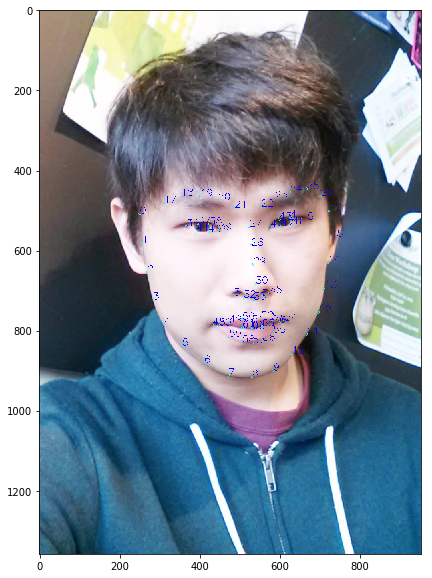

In [12]:
img = cv2.imread('DATA/me3.png')
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
landmarks = get_landmarks(img)

image_with_lm = annotate_landmarks(img, landmarks)

plt.figure(figsize = (10,10))
plt.imshow(image_with_lm)